In [ ]:
from logging import warning
import numpy as np

import pandas as pd

import datetime

import matplotlib.pyplot as plt

import seaborn as sns

import copy

import warnings
warnings.filterwarnings('ignore')

# Problem Statement

Aerofit wants to identify the characteristics of customers purchasing each treadmill (KP281, KP481, KP781). The goal is to create customer profiles, detect outliers, and analyze probabilities (marginal, conditional, joint) to provide business insights for targeted marketing and product recommendations.

# 1. Analysis of basic metrics

In [ ]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749")
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


## Shape of data

In [ ]:
df.shape

(180, 9)

## Data types of the provided attributes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


## Conversion of categorical attributes to 'category'

In [ ]:
df["Product"] = df["Product"].astype("category")
df["Gender"] = df["Gender"].astype("category")
df["MaritalStatus"] = df["MaritalStatus"].astype("category")

Product → categorical (KP281, KP481, KP781).

Age → numeric.

Gender → categorical.

Education → numeric (years).

MaritalStatus → categorical (Single, Partnered).

Usage → numeric (weekly usage).

Fitness → numeric (self-rating).

Income → numeric (annual income).

Miles → numeric (expected miles of treadmill usage).

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


## Missing values per column

In [ ]:
missing_value_column_list = df.isnull().any().to_frame()
missing_value_column_list
missing_value_columns = missing_value_column_list[missing_value_column_list[0]]
missing_value_columns

,0


* There are no missing values in any of the columns of the given dataset.

## Statistical summary

### Numeric attributes

In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


#### Comments on Range of Attributes

1. **Age** - Customers are mainly young adults, with a few older buyers. Aerofit’s treadmills appeal primarily to younger demographic groups.

2. **Education** - Customers generally have 15–17 years of education (college level). Education does not vary much across customers.

3. **Usage (days/week)** - Majority of customers are moderate users, but there is a subgroup that uses treadmills much more frequently.

4. **Fitness (self-rating)** - Customers generally rate themselves as moderately fit; fitness scores are clustered, not much variation.

5. **Income** - Customers come from diverse income groups, from mid-income to high-income professionals. Income is a key differentiator between product types.

6. **Miles (monthly distance)** - Customers range from casual walkers (~20–40 miles/month) to heavy runners (200+ miles/month). Product choice is strongly linked with mileage.

### Categorical attributes

In [ ]:
df.describe(include="category")

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


#2. Non-Graphical Analysis: Value counts and unique attributes ​

In [ ]:
df.nunique()

,0
Product,3
Age,32
Gender,2
Education,8
MaritalStatus,2
Usage,6
Fitness,5
Income,62
Miles,37


In [ ]:
df["MaritalStatus"].unique()

['Single', 'Partnered']
Categories (2, object): ['Partnered', 'Single']

In [ ]:
df["Gender"].unique()

['Male', 'Female']
Categories (2, object): ['Female', 'Male']

In [ ]:
df["Product"].unique()

['KP281', 'KP481', 'KP781']
Categories (3, object): ['KP281', 'KP481', 'KP781']

### Unique attributes in categorical columns:

*   Product: 3 (KP281, KP481, KP781)
*   Gender: 2 (Male, Female)
*   MaritalStatus: 2 (Single, Partnered)









## Value counts for categorical variables

In [ ]:
df["Product"].value_counts(normalize=True) * 100

,proportion
Product,
KP281,44.444444
KP481,33.333333
KP781,22.222222


In [ ]:
df["Gender"].value_counts(normalize=True) * 100

,proportion
Gender,
Male,57.777778
Female,42.222222


In [ ]:

df["MaritalStatus"].value_counts(normalize=True) * 100

,proportion
MaritalStatus,
Partnered,59.444444
Single,40.555556


#### Comments on Categorical Attributes

1. KP281, which is the entry-level threadmill sells more than other two categories and we can also notice that quantity sold decreases when price increases.KP281 (~ 44%) is most purchased, followed by KP481 (~ 33%) and KP781 (~ 22%). → KP281 is the mass-market treadmill, KP781 is a niche premium product.

2. Males are utilising threadmill significantly higher than Females.

3. Married people are utilising threadmill significantly higher than singles.


# 3. Visual Analysis - Univariate & Bivariate

## For Continuous variables(Univariate):

In [ ]:
Age = df['Age']
Education = df['Education']
Income = df['Income']
Usage = df["Usage"]
Fitness = df["Fitness"]
Miles = df["Miles"]

### Age

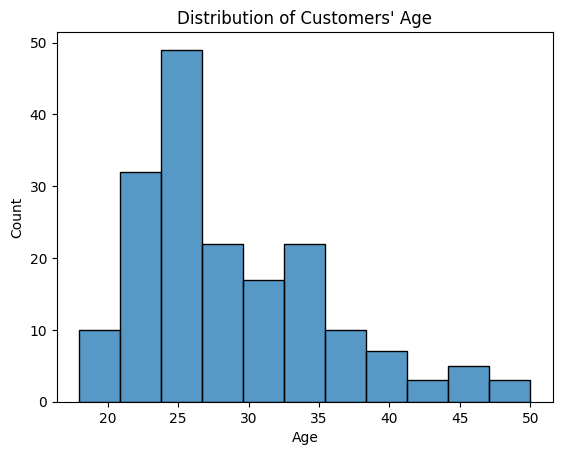

In [ ]:
sns.histplot(data=df,x="Age")
plt.title("Distribution of Customers' Age")
plt.show()

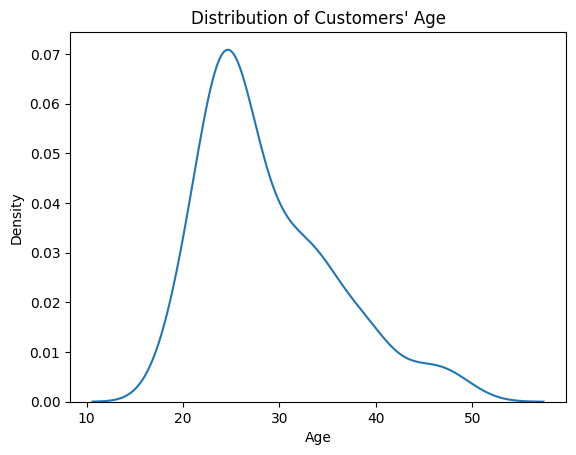

In [ ]:
sns.kdeplot(data=df,x="Age")
plt.title("Distribution of Customers' Age")
plt.show()

The age distribution is slightly right-skewed, with most customers between 20–35 years. Very few older customers pull the mean upward. Aerofit treadmills are primarily used by young adults.

### Education

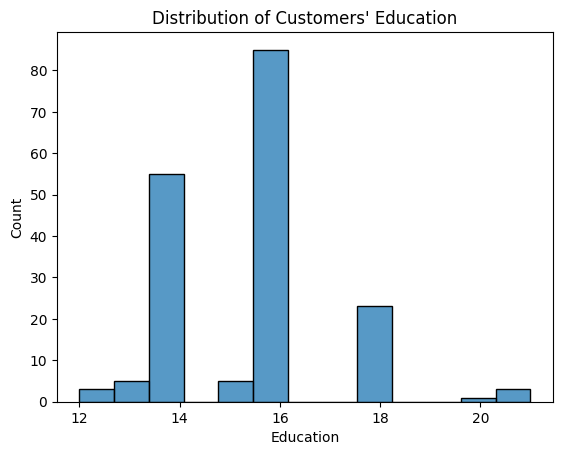

In [ ]:
sns.histplot(data=df,x="Education")
# sns.histplot(data=df,x="Education")
plt.title("Distribution of Customers' Education")
plt.show()

Education levels are tightly clustered between 15–17 years, showing most customers are college-educated. This attribute does not vary much across products.

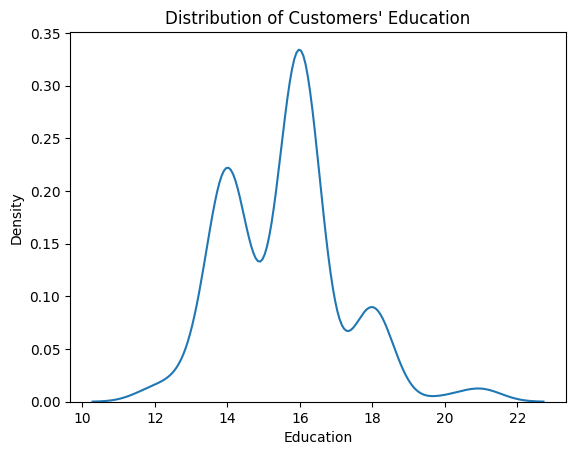

In [ ]:
sns.kdeplot(data=df,x="Education")
plt.title("Distribution of Customers' Education")
plt.show()

### Income

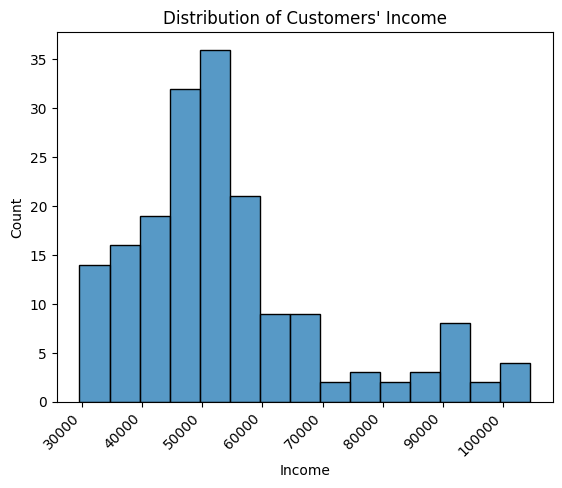

In [ ]:
sns.histplot(data=df,x="Income")
plt.title("Distribution of Customers' Income")
plt.xticks(rotation = 45,ha="right")
plt.show()

Income distribution is wide, ranging from ₹29k to ₹104k, with most customers earning ₹40k–₹60k. This confirms Aerofit’s customer base spans from mid-income to high-income professionals.

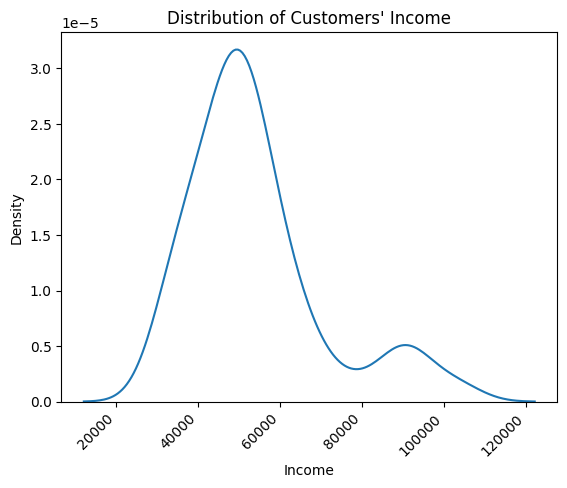

In [ ]:
sns.kdeplot(data=df,x="Income")
plt.title("Distribution of Customers' Income")
plt.xticks(rotation = 45,ha="right")
plt.show()

### Miles

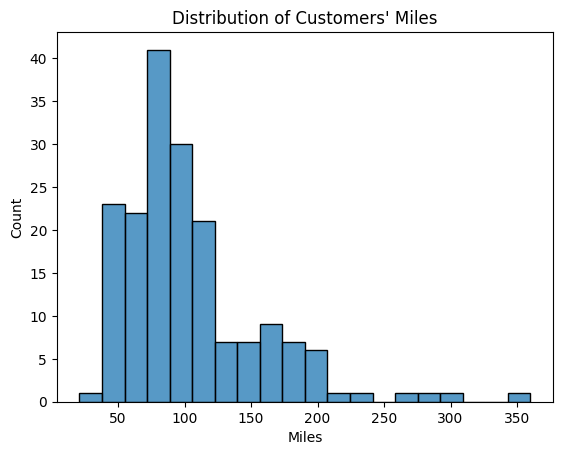

In [ ]:
sns.histplot(data=df,x="Miles")
plt.title("Distribution of Customers' Miles")
plt.show()

 The mileage distribution is right-skewed, with most customers running 80–120 miles per month. A small segment exceeds 200 miles, representing serious athletes.

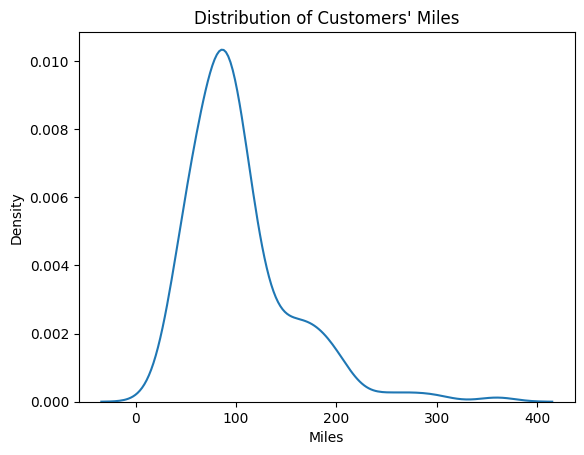

In [ ]:
sns.kdeplot(data=df,x="Miles")
plt.title("Distribution of Customers' Miles")
plt.show()

### Fitness

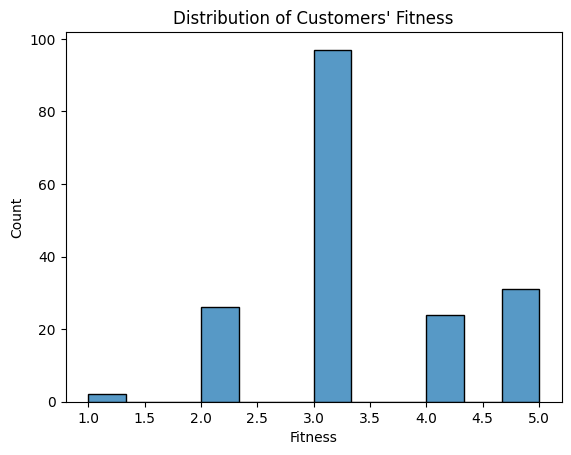

In [ ]:
sns.histplot(data=df,x="Fitness")
plt.title("Distribution of Customers' Fitness")
plt.show()

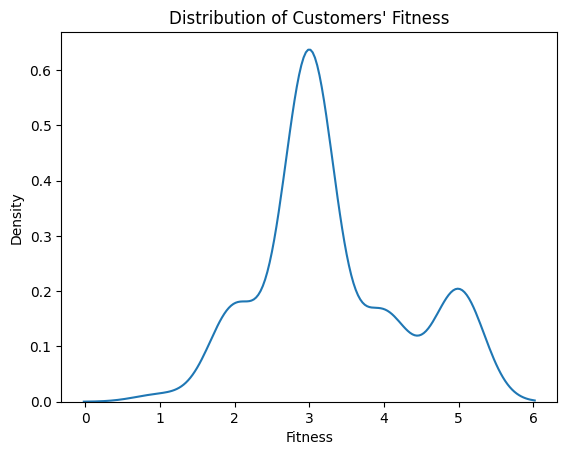

In [ ]:
sns.kdeplot(data=df,x="Fitness")
plt.title("Distribution of Customers' Fitness")
plt.show()

Fitness self-ratings are clustered around 3–4 (on a 1–5 scale). Few customers rate themselves very low or very high. Customers generally perceive themselves as moderately fit.

### Usage

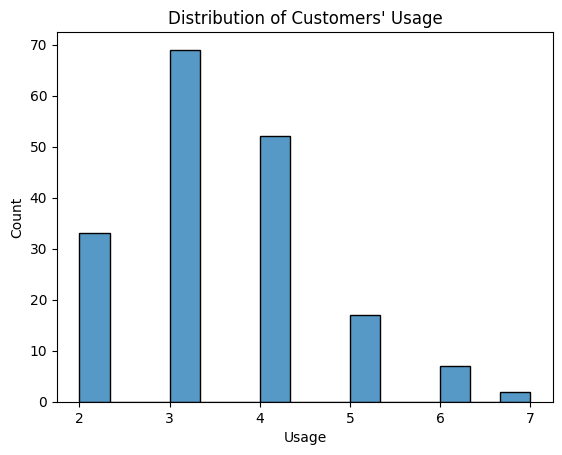

In [ ]:
sns.histplot(data=df,x="Usage")
plt.title("Distribution of Customers' Usage")
plt.show()

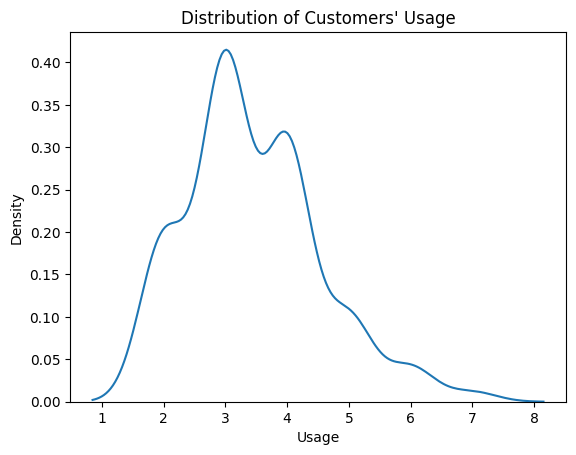

In [ ]:
sns.kdeplot(data=df,x="Usage")
plt.title("Distribution of Customers' Usage")
plt.show()

Most customers use treadmills 2–4 times per week. A smaller segment uses it very frequently (5–7 times), showing the mix of casual and dedicated users.

## For Categorical Variables (Univariate and Bivariate)

### Gender

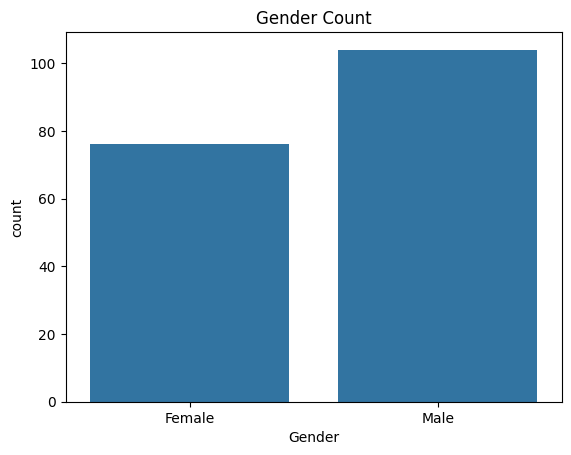

In [ ]:
sns.countplot(data=df, x="Gender")
plt.title("Gender Count")
plt.show()

Male usage is bit higher than the Female usage.

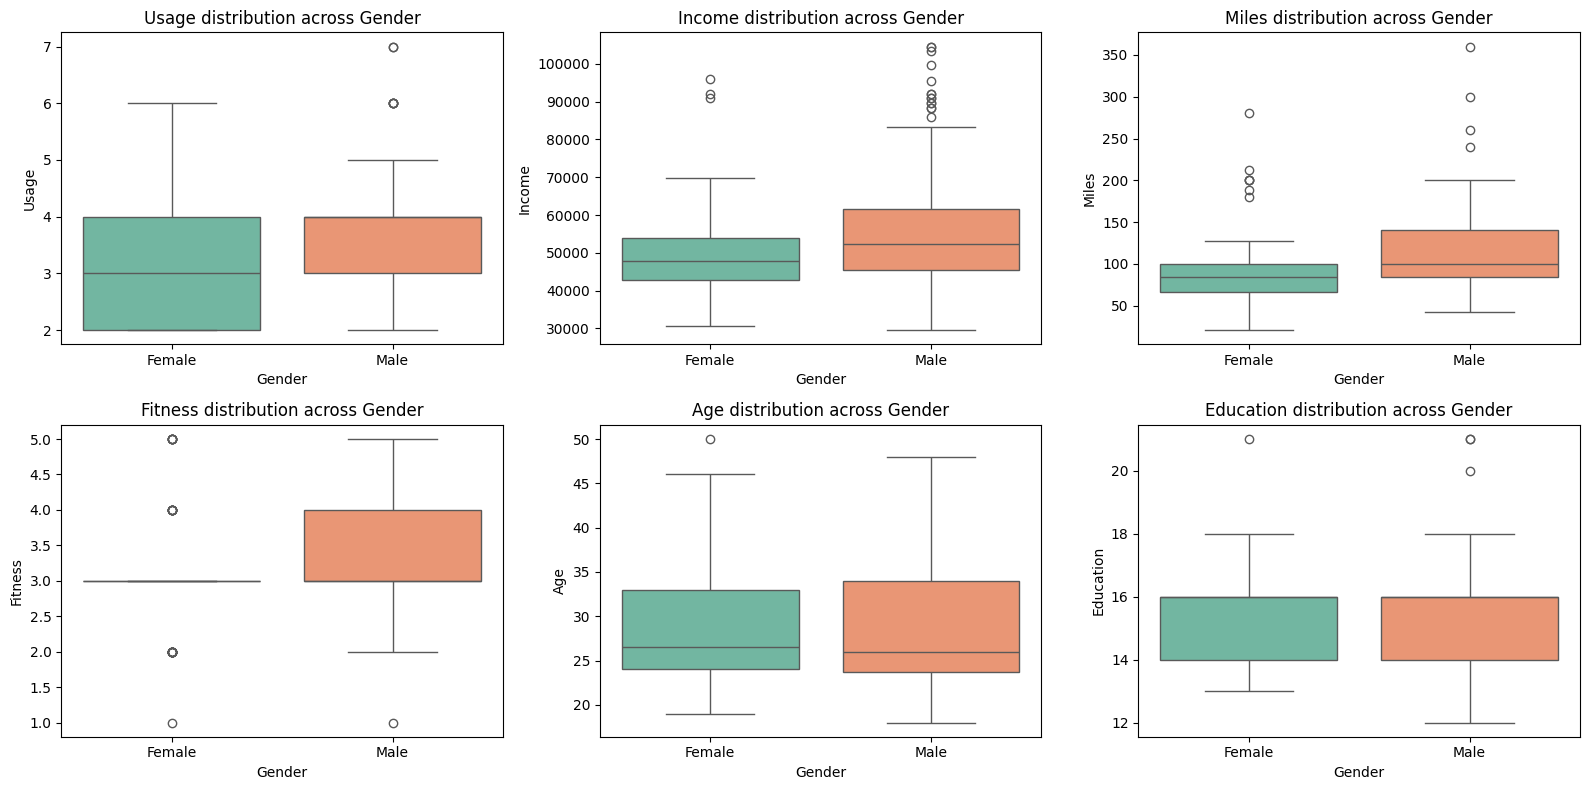

In [ ]:
fig,axes = plt.subplots(2,3,figsize=(16,8))

sns.boxplot(data=df, x="Gender",y="Usage",hue="Gender",palette="Set2",ax = axes[0,0])
axes[0,0].set_title("Usage distribution across Gender")


sns.boxplot(data=df, x="Gender",y="Income",hue="Gender",palette="Set2",ax = axes[0,1])
axes[0,1].set_title("Income distribution across Gender")

sns.boxplot(data=df, x="Gender",y="Miles",hue="Gender",palette="Set2",ax = axes[0,2])
axes[0,2].set_title("Miles distribution across Gender")

sns.boxplot(data=df, x="Gender",y="Fitness",hue="Gender",palette="Set2",ax = axes[1,0])
axes[1,0].set_title("Fitness distribution across Gender")

sns.boxplot(data=df, x="Gender",y="Age",hue="Gender",palette="Set2",ax = axes[1,1])
axes[1,1].set_title("Age distribution across Gender")

sns.boxplot(data=df, x="Gender",y="Education",hue="Gender",palette="Set2",ax = axes[1,2])
axes[1,2].set_title("Education distribution across Gender")


plt.tight_layout()
plt.show()

* Males have slightly higher median income (~₹52k vs ₹47k) and much greater spread (more outliers), indicating wider affordability. Females are more clustered in income levels.
* Males show greater variability in mileage, including very high-mileage outliers. Females are more consistent but still include a niche group of extreme runners.
* Females show a wider range of treadmill usage, while males are more consistent around 3–4 days/week.
* KP281 and KP481 have balanced gender distribution, while KP781 is strongly male-dominated (82.5% male buyers).

### Product

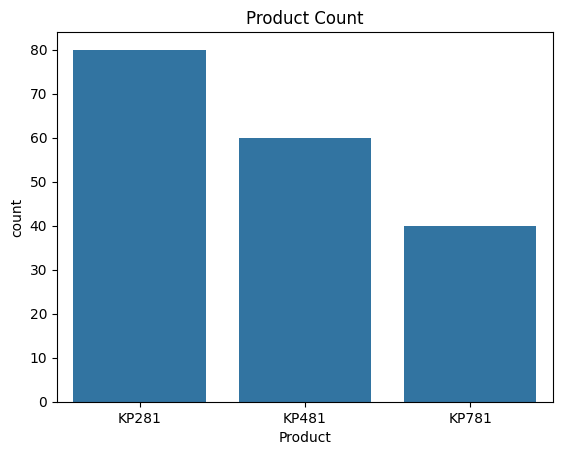

In [ ]:
sns.countplot(data=df, x="Product")
plt.title("Product Count")
plt.show()

KP281, which is the entry-level threadmill sells more than other two categories and we can also notice that quantity sold decreases when price increases.

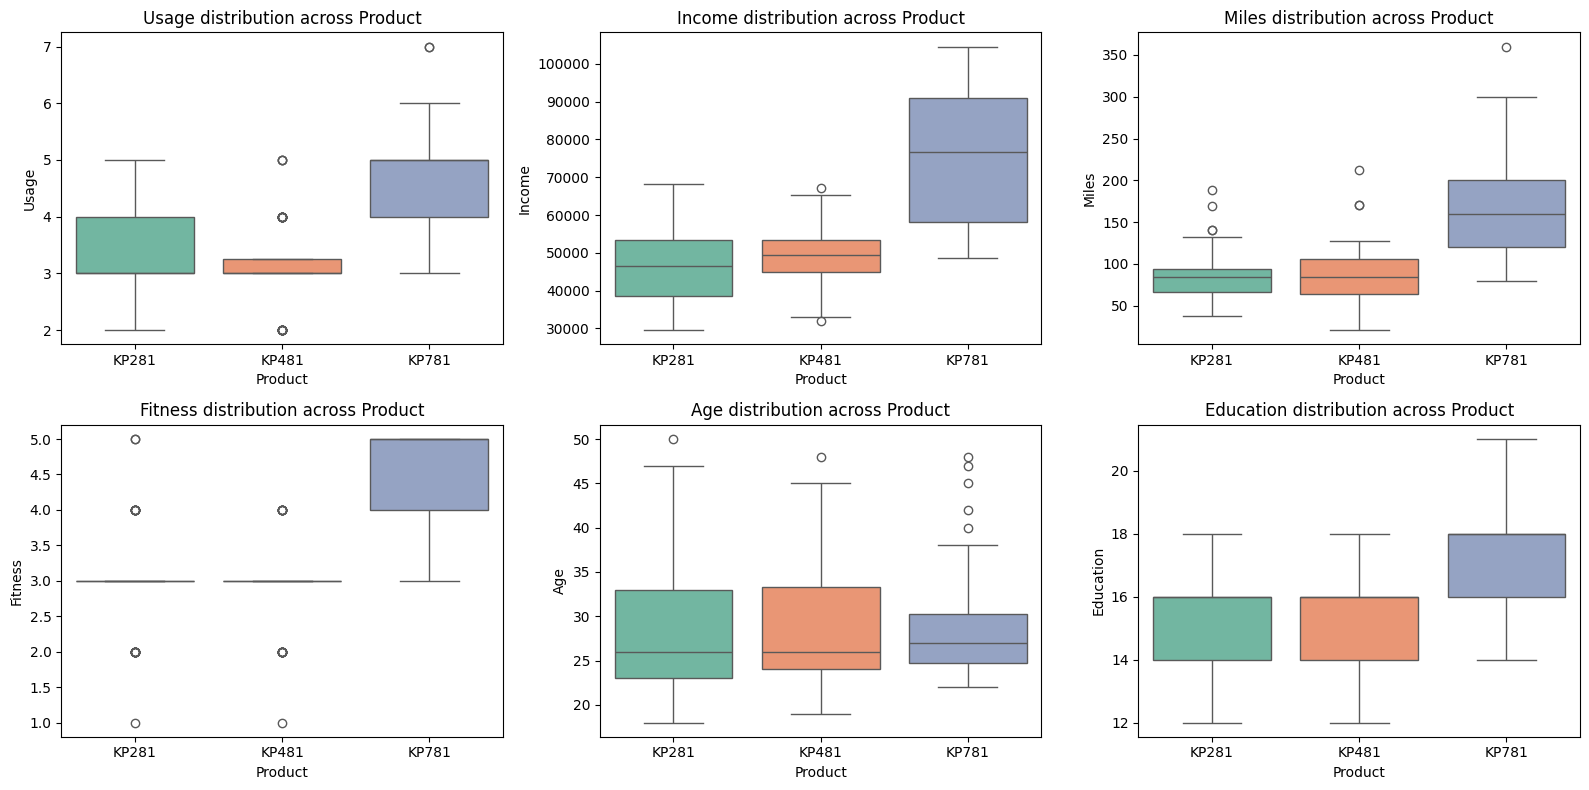

In [ ]:
plt.figure(figsize=(16,8))

plt.subplot(2,3,1)
sns.boxplot(data=df, x="Product",y="Usage",hue="Product",palette="Set2")
plt.title("Usage distribution across Product")

plt.subplot(2,3,2)
sns.boxplot(data=df, x="Product",y="Income",hue="Product",palette="Set2")
plt.title("Income distribution across Product")


plt.subplot(2,3,3)
sns.boxplot(data=df, x="Product",y="Miles",hue="Product",palette="Set2")
plt.title("Miles distribution across Product")


plt.subplot(2,3,4)
sns.boxplot(data=df, x="Product",y="Fitness",hue="Product",palette="Set2")
plt.title("Fitness distribution across Product")


plt.subplot(2,3,5)
sns.boxplot(data=df, x="Product",y="Age",hue="Product",palette="Set2")
plt.title("Age distribution across Product")


plt.subplot(2,3,6)
sns.boxplot(data=df, x="Product",y="Education",hue="Product",palette="Set2")
plt.title("Education distribution across Product")

plt.tight_layout()
plt.show()

* KP781 customers have significantly higher median income (₹46k) and KP481 (~ ₹49k). This confirms Income as the key differentiator between product tiers.
* KP781 customers run far more miles (median ~ 160) compared to KP281/481 (~ 85 miles). Product choice clearly aligns with treadmill usage intensity.
* KP781 customers use treadmills ~ 5 days/week, while KP281/481 users average ~ 3 days/week. KP481 shows unusually tight clustering (very consistent usage).
* KP781 customers rate fitness higher (~ 4.6/5) than KP281/481 (~ 3/5), showing premium buyers are more fitness-conscious.


### Marital Status

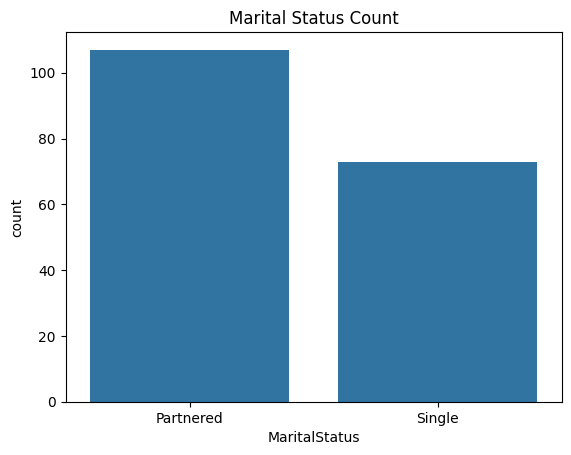

In [ ]:
sns.countplot(data=df, x="MaritalStatus")
plt.title("Marital Status Count")
plt.show()

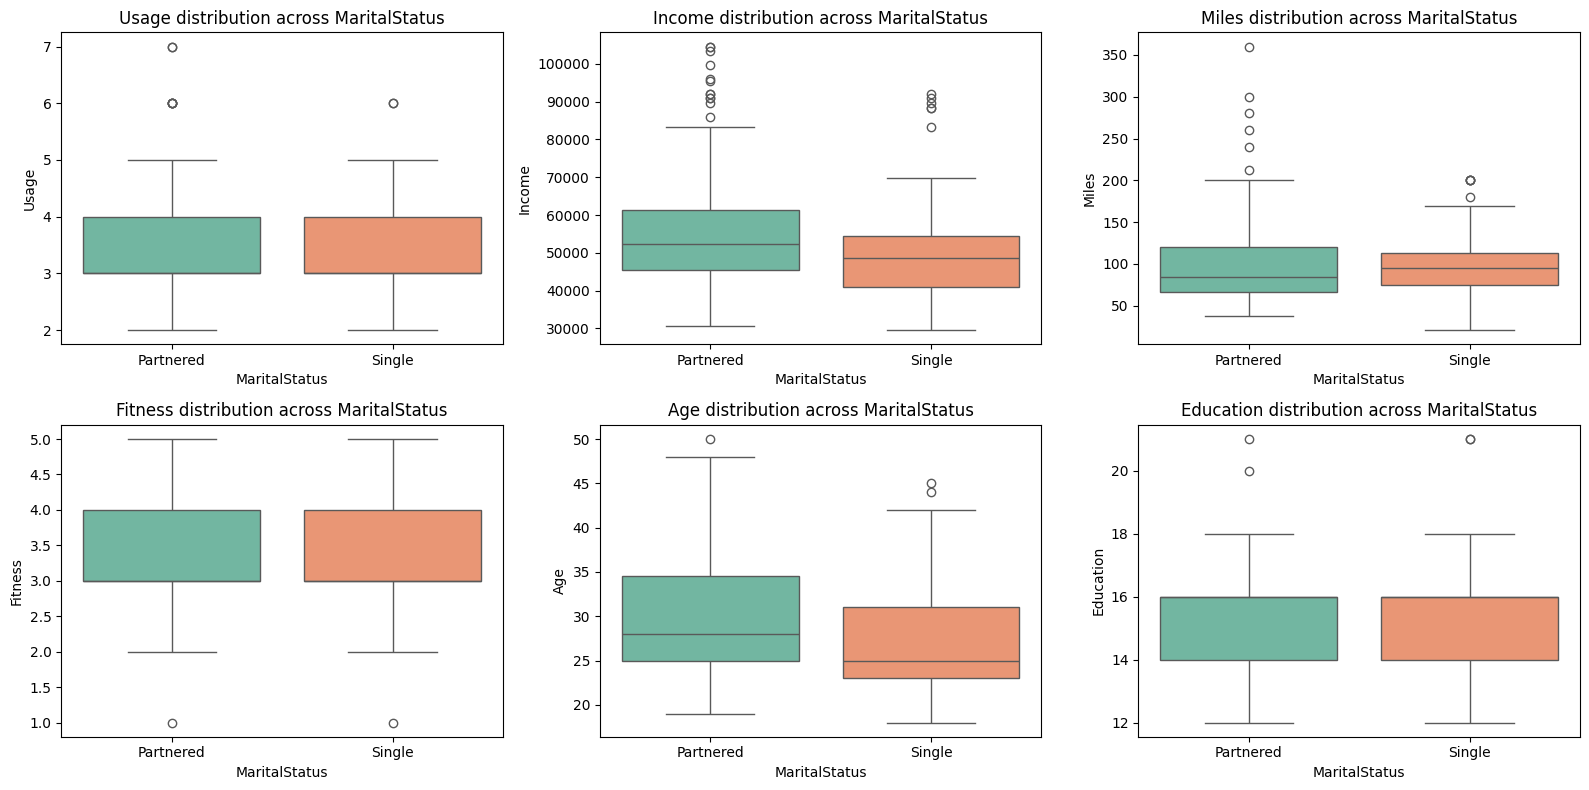

In [ ]:
plt.figure(figsize=(16,8))

plt.subplot(2,3,1)
sns.boxplot(data=df, x="MaritalStatus",y="Usage",hue="MaritalStatus",palette="Set2")
plt.title("Usage distribution across MaritalStatus")

plt.subplot(2,3,2)
sns.boxplot(data=df, x="MaritalStatus",y="Income",hue="MaritalStatus",palette="Set2")
plt.title("Income distribution across MaritalStatus")


plt.subplot(2,3,3)
sns.boxplot(data=df, x="MaritalStatus",y="Miles",hue="MaritalStatus",palette="Set2")
plt.title("Miles distribution across MaritalStatus")


plt.subplot(2,3,4)
sns.boxplot(data=df, x="MaritalStatus",y="Fitness",hue="MaritalStatus",palette="Set2")
plt.title("Fitness distribution across MaritalStatus")


plt.subplot(2,3,5)
sns.boxplot(data=df, x="MaritalStatus",y="Age",hue="MaritalStatus",palette="Set2")
plt.title("Age distribution across MaritalStatus")


plt.subplot(2,3,6)
sns.boxplot(data=df, x="MaritalStatus",y="Education",hue="MaritalStatus",palette="Set2")
plt.title("Education distribution across MaritalStatus")

plt.tight_layout()
plt.show()

* All products show ~60% Partnered, ~40% Single. Marital status does not strongly influence treadmill choice.

### Comments on Distributions and Relationship between the Variables

* Distributions show that most Aerofit customers are young adults with moderate
fitness levels, treadmill usage (~ 3 days/week), and mileage (~ 80–120 miles/month). Income and Miles have wide ranges, revealing both budget and premium buyers, as well as casual and serious users.

* Relationship analysis highlights that treadmill Usage and Miles are strongly correlated, confirming logical consistency. Fitness ratings also positively relate to usage behavior. Income, while not strongly related to treadmill usage, is the key factor differentiating product choice, especially for KP781 buyers. Age and Education show little variation across products, suggesting limited influence on customer segmentation.

## For Correlation (between continuous variables)

### Age,Income,Fitness and Education Vs Usage Correlation

In [ ]:
Age_usage = df[['Age','Usage']].corr()
Income_Usage = df[['Income','Usage']].corr()
Fitness_Usage = df[["Fitness",'Usage']].corr()
Education_Usage = df[["Education",'Usage']].corr()
Miles_Usage = df[["Miles",'Usage']].corr()

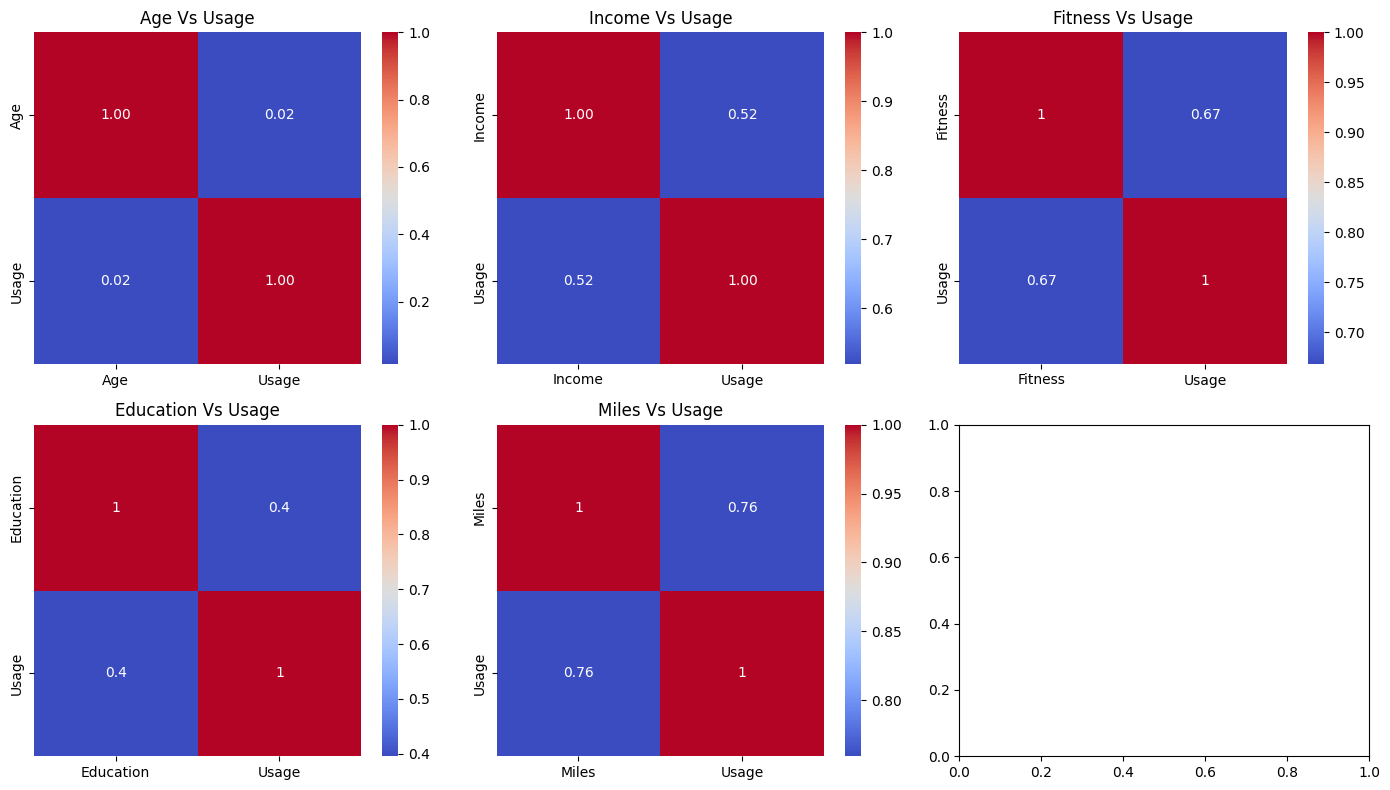

In [ ]:
fig,axes = plt.subplots(2,3,figsize=(14,8))

sns.heatmap(Age_usage,cmap='coolwarm',annot=True,fmt=".2f",ax= axes[0,0])
axes[0,0].set_title("Age Vs Usage")


sns.heatmap(Income_Usage,cmap='coolwarm',annot=True,fmt=".2f",ax= axes[0,1])
axes[0,1].set_title("Income Vs Usage")


sns.heatmap(Fitness_Usage,cmap='coolwarm',annot=True,ax= axes[0,2])
axes[0,2].set_title("Fitness Vs Usage")

sns.heatmap(Education_Usage,cmap='coolwarm',annot=True,ax= axes[1,0])
axes[1,0].set_title("Education Vs Usage")

sns.heatmap(Miles_Usage,cmap='coolwarm',annot=True,ax= axes[1,1])
axes[1,1].set_title("Miles Vs Usage")

plt.tight_layout()
plt.show()

Strong positive correlation between Usage and Miles (~0.7). Income is weakly correlated with Usage and Miles, confirming that higher income does not necessarily mean more treadmill use. Fitness moderately correlates with Usage.

### Corelation between variables across product category

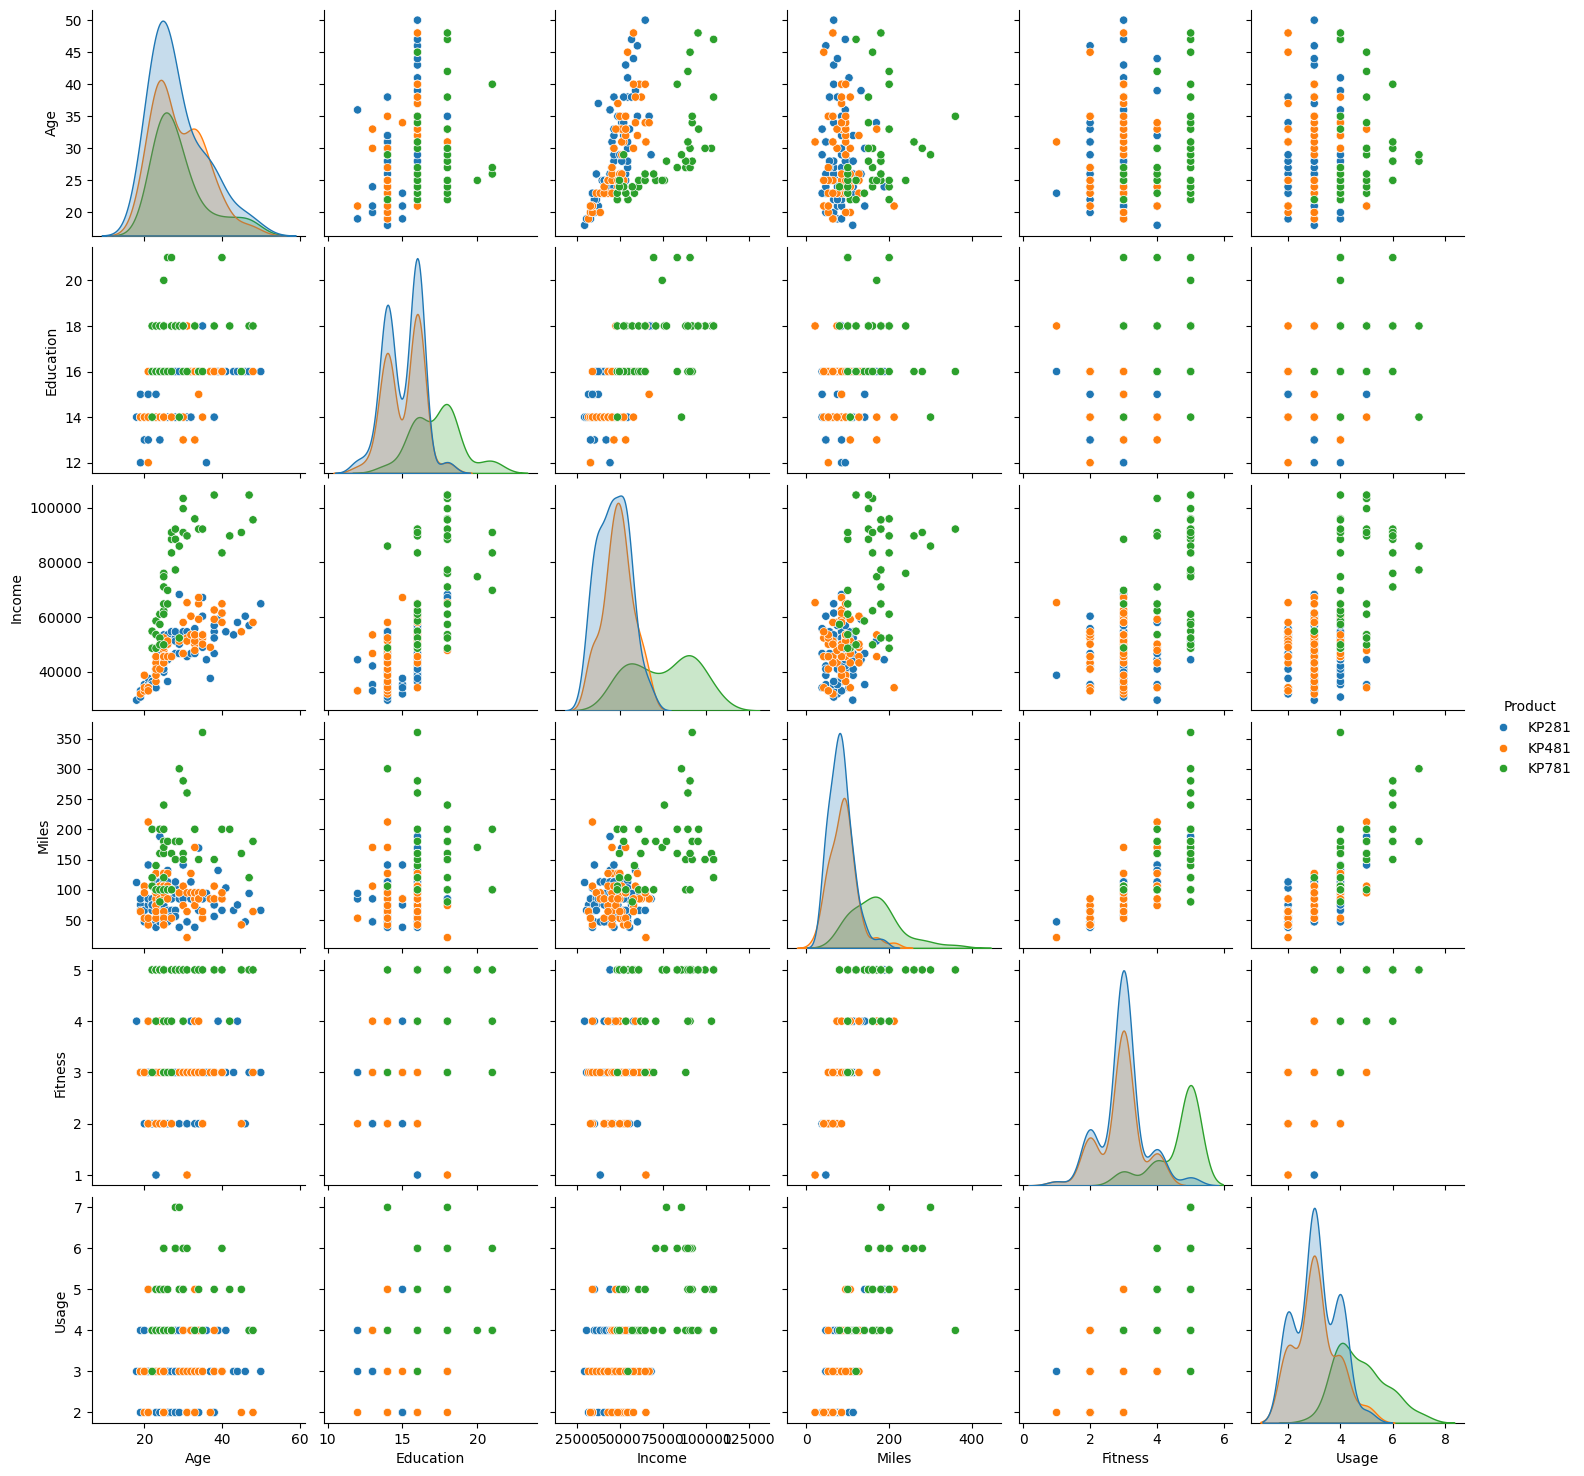

In [ ]:
sns.pairplot(data= df,vars= ['Age','Education','Income','Miles','Fitness','Usage'],hue="Product")
plt.show()

* By observing Diagonal density plots,we can see that Product differentiation is strongest by Income, Miles, Usage, Fitness, not by Age or Education.
* By observing Scatter Plots KP781 buyers are distinct: high income, high usage, high mileage, high fitness. KP281/481 overlap, targeting average customers.

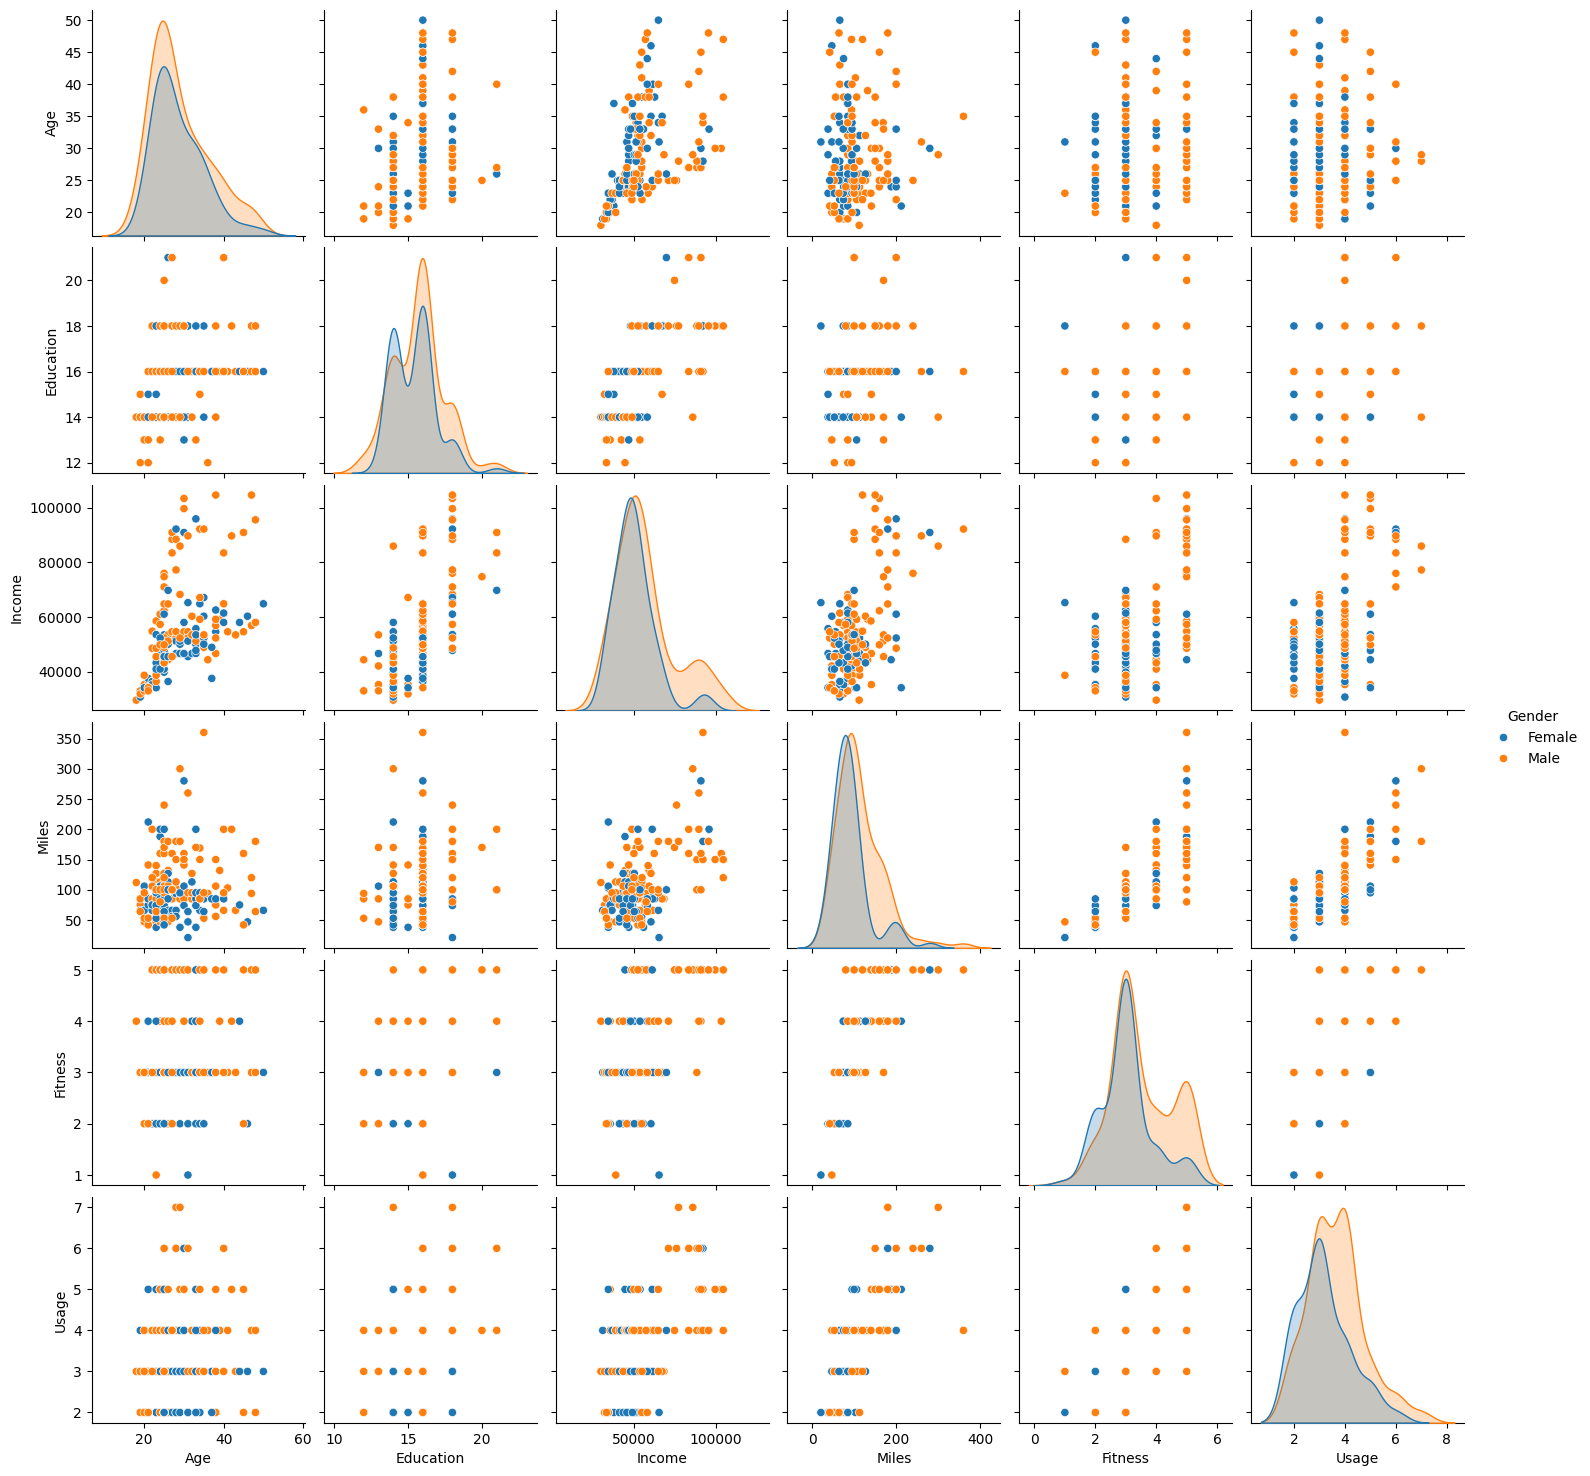

In [ ]:
sns.pairplot(data= df,vars= ['Age','Education','Income','Miles','Fitness','Usage'],hue="Gender")
plt.show()

* By observing Diagonal Density plots,we can notice that Gender differences appear mainly in Income and Miles. Other variables (Age, Education, Fitness, Usage) are balanced.

* By observing Scatter plots,we can see that Male customers dominate the extreme segments (very high income, very high mileage), while female customers are more consistent

# 4. Outliers detection

## Outlier Check - Numeric columns

In [ ]:
def mean_median_outlier_check(df, cols=None, threshold_mild=0.3, threshold_strong=0.5):

    if cols is None:
        cols = df.select_dtypes(include=[np.number]).columns.tolist()

    records = []
    for col in cols:
        desc = df[col].describe()
        mean_val = desc["mean"]
        median_val = desc["50%"]
        std_val = desc["std"]
        q1 = desc["25%"]
        q3 = desc["75%"]
        iqr = q3 - q1
        diff = abs(mean_val - median_val)

        ratio_std = diff / std_val if std_val > 0 else np.nan
        ratio_iqr = diff / iqr if iqr > 0 else np.nan

        # Flag based on std (primary)
        if ratio_std >= threshold_strong:
            flag = "Strong skew/outliers"
        elif ratio_std >= threshold_mild:
            flag = "Mild skew/outliers"
        else:
            flag = "Symmetric"

        records.append({
            "col": col,
            "mean": mean_val,
            "median": median_val,
            "std": std_val,
            "IQR": iqr,
            "mean-median": diff,
            "diff/std": ratio_std,
            "diff/IQR": ratio_iqr,
            "flag": flag
        })

    return pd.DataFrame(records)

In [ ]:
numeric_cols = ["Age","Education","Usage","Fitness","Income","Miles"]

outlier_check = mean_median_outlier_check(df, cols=numeric_cols)
print(outlier_check)


         col          mean   median           std       IQR  mean-median  \
0        Age     28.788889     26.0      6.943498      9.00     2.788889   
1  Education     15.572222     16.0      1.617055      2.00     0.427778   
2      Usage      3.455556      3.0      1.084797      1.00     0.455556   
3    Fitness      3.311111      3.0      0.958869      1.00     0.311111   
4     Income  53719.577778  50596.5  16506.684226  14609.25  3123.077778   
5      Miles    103.194444     94.0     51.863605     48.75     9.194444   

   diff/std  diff/IQR                flag  
0  0.401655  0.309877  Mild skew/outliers  
1  0.264541  0.213889           Symmetric  
2  0.419945  0.455556  Mild skew/outliers  
3  0.324456  0.311111  Mild skew/outliers  
4  0.189201  0.213774           Symmetric  
5  0.177281  0.188604           Symmetric  


* Outlier detection using the mean–median method revealed mild skew in Age, **Usage, and Fitness**, suggesting the presence of customers who are significantly older, use the treadmill much more frequently, or report unusually high fitness levels compared to the majority.

* **Income, Education, and Miles** appeared symmetric overall, but Income and Miles showed group-level outliers when analyzed by Product and Gender, indicating that subgroup analysis provides more actionable insights than overall summary statistics.

* This analysis is done at dataset-level. Next we'll proceed with group-level because both perspectives matter.

## Outlier Check - Group level

In [ ]:
df.groupby("Gender",observed=False).size()

,0
Gender,
Female,76
Male,104


Since,our dataset has no missing values, df.groupby("Gender").size() is enough.

In [ ]:
df.groupby("Product",observed=False).size()

,0
Product,
KP281,80
KP481,60
KP781,40


In [ ]:
df.groupby("MaritalStatus",observed=False).size()

,0
MaritalStatus,
Partnered,107
Single,73


Very small groups (say < 20–30 rows) often don’t give stable patterns in boxplots or summaries.But,None of the groups are too small. The smallest group is KP781 with 40 rows, which is still okay for analysis. That means all 3 categorical variables (Gender, Product, MaritalStatus) can be included for boxplots and bivariate analysis.

In [ ]:
cols = ["Age","Education","Usage","Fitness","Income","Miles"]
group_gender = "Gender"
Q1 = df.groupby(group_gender)[cols].quantile(0.25)
Q3 = df.groupby(group_gender)[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

,Age,Education,Usage,Fitness,Income,Miles
Gender,,,,,,
Female,9.00,2.0,2.0,0.0,10874.25,34.0
Male,10.25,2.0,1.0,1.0,16131.25,56.0


In [ ]:
cols = ["Age","Education","Usage","Fitness","Income","Miles"]
group_product = "Product"
Q1 = df.groupby(group_product)[cols].quantile(0.25)
Q3 = df.groupby(group_product)[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

,Age,Education,Usage,Fitness,Income,Miles
Product,,,,,,
KP281,10.00,2.0,1.00,0.0,14781.00,28.0
KP481,9.25,2.0,0.25,0.0,8527.50,42.0
KP781,5.50,2.0,1.00,1.0,32681.25,80.0


In [ ]:
cols = ["Age","Education","Usage","Fitness","Income","Miles"]
group_MaritalStatus = "MaritalStatus"
Q1 = df.groupby(group_MaritalStatus)[cols].quantile(0.25)
Q3 = df.groupby(group_MaritalStatus)[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

,Age,Education,Usage,Fitness,Income,Miles
MaritalStatus,,,,,,
Partnered,9.5,2.0,1.0,1.0,15722.0,54.0
Single,8.0,2.0,1.0,1.0,13644.0,38.0


In [ ]:
df.groupby("Gender")["Income"].median()

,Income
Gender,
Female,47754.0
Male,52302.0


In [ ]:
df.groupby("Product")["Income"].median()

,Income
Product,
KP281,46617.0
KP481,49459.5
KP781,76568.5


**Gender**

<font color='orange'>Usage & Miles show clear differences:<font/>



*   Female customers show more variation in treadmill usage (IQR = 2) compared to males (IQR = 1).
*  Male customers show wider spread in miles run (IQR = 56) compared to females (IQR = 34).

*  Income has slightly higher variability among males (IQR = 16,131 vs 10,874), suggesting further segmentation by income might be useful for male customers.

*  Age, Education, and Fitness did not show meaningful separation between genders and were excluded from further analysis.

<br>

**Product**

<font color='orange'>Strong differences observed across products:<font/>

*  Income: Customers of KP781 have significantly higher median income (₹76k) compared to KP281 (₹46k) and KP481 (₹49k).

*  Miles: KP781 customers run substantially more miles (IQR = 80) compared to KP281 (IQR = 28) and KP481 (IQR = 42).

*  Usage: KP481 customers show very consistent treadmill usage (IQR = 0.25), indicating a specific user pattern.

*  Age: KP781 customers have a narrower age range (IQR = 5.5) than other models, suggesting a more concentrated age group.

These insights highlight Income, Miles, Usage, and Age as key differentiators across products.

<br>


**Marital Status**

<font color='orange'>Income and Miles show slight differences:<font/>

*  Partnered customers have marginally higher income (₹15.7k vs ₹13.6k) and run more miles (IQR = 54 vs 38).

*  However, the overall differences between Partnered and Single customers are not strong enough to drive major business recommendations.

*  Other variables (Age, Education, Fitness, Usage) did not show significant distinctions and were excluded.

Hence from above analysis, we finalized boxplots where variability really matters.

1. **Gender** → Usage, Miles, (optionally Income).

2. **Product** → Income, Miles, Usage, Age.

3. **Marital Status** → Income, Miles (since only mild insights there).

Outlier detection was performed only on variables where group differences were meaningful (as identified in the boxplot analysis). This included Usage and Miles across Gender, and Income, Miles, Usage, and Age across Product. Other variables (such as Education or Fitness) were excluded, as they showed no significant group-level separation.

## **Gender - considered outliers**

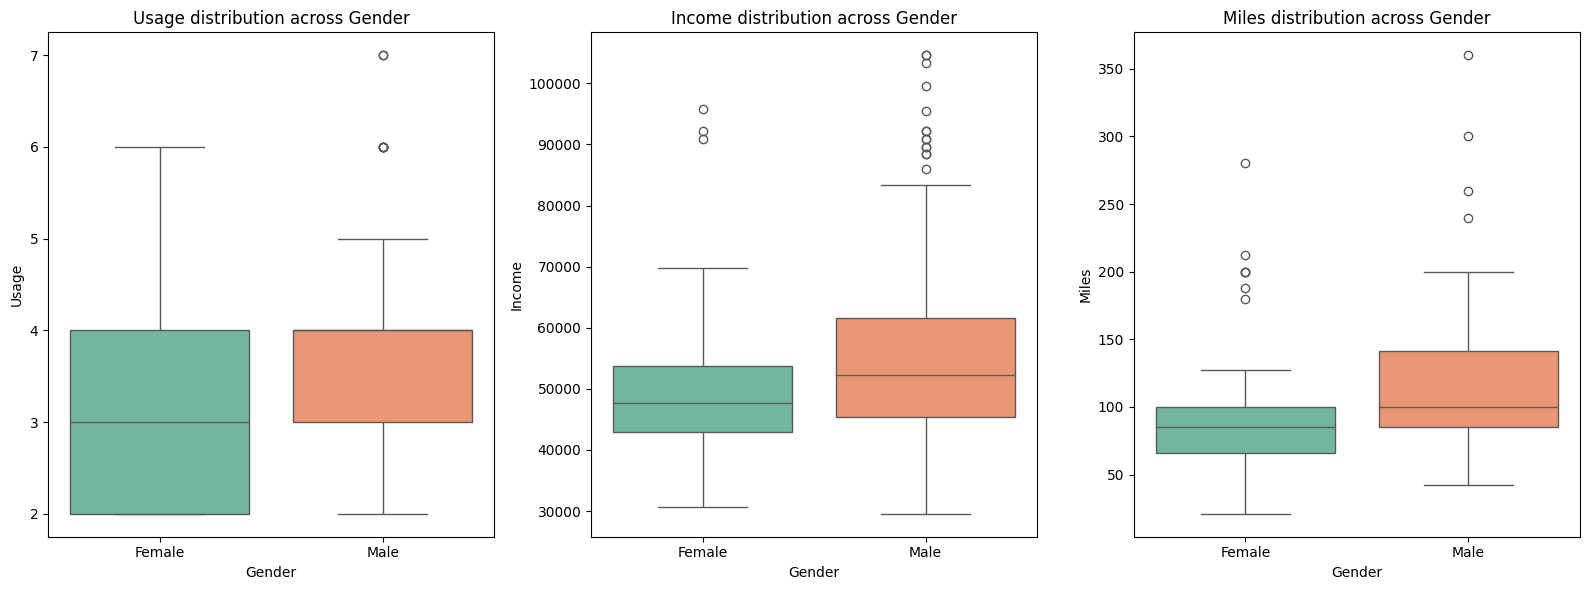

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(16,6))

sns.boxplot(data=df, x="Gender",y="Usage",hue="Gender",palette="Set2",ax = axes[0])
axes[0].set_title("Usage distribution across Gender")


sns.boxplot(data=df, x="Gender",y="Income",hue="Gender",palette="Set2",ax = axes[1])
axes[1].set_title("Income distribution across Gender")

sns.boxplot(data=df, x="Gender",y="Miles",hue="Gender",palette="Set2",ax = axes[2])
axes[2].set_title("Miles distribution across Gender")

plt.tight_layout()
plt.show()


## **Product -  considered outliers**

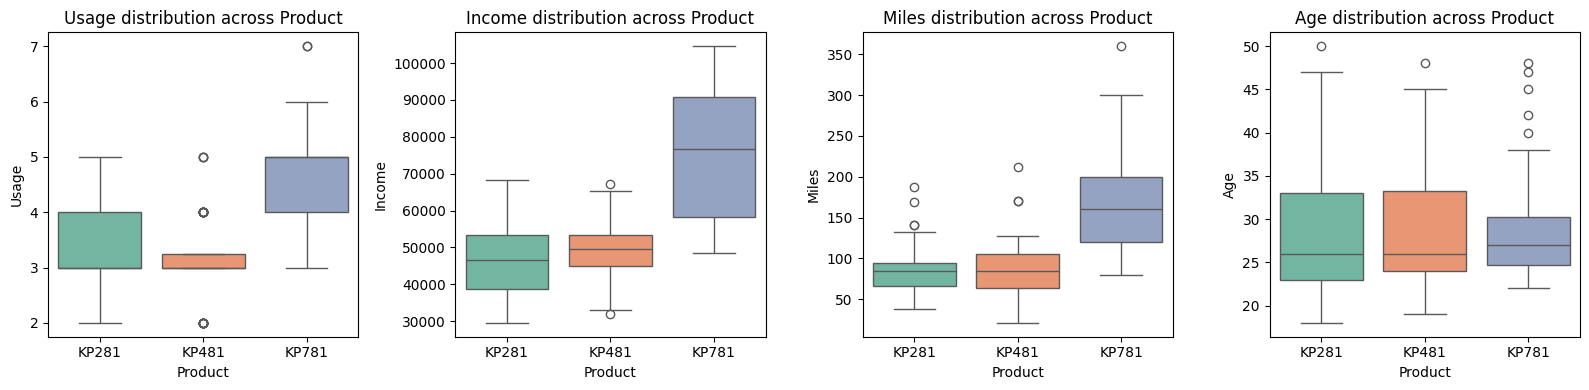

In [ ]:
fig,axes = plt.subplots(1,4,figsize=(16,4))

sns.boxplot(data=df, x="Product",y="Usage",hue="Product",palette="Set2",ax = axes[0])
axes[0].set_title("Usage distribution across Product")


sns.boxplot(data=df, x="Product",y="Income",hue="Product",palette="Set2",ax = axes[1])
axes[1].set_title("Income distribution across Product")

sns.boxplot(data=df, x="Product",y="Miles",hue="Product",palette="Set2",ax = axes[2])
axes[2].set_title("Miles distribution across Product")

sns.boxplot(data=df, x="Product",y="Age",hue="Product",palette="Set2",ax = axes[3])
axes[3].set_title("Age distribution across Product")

plt.tight_layout()
plt.show()

## **Marital Status -  considered outliers**

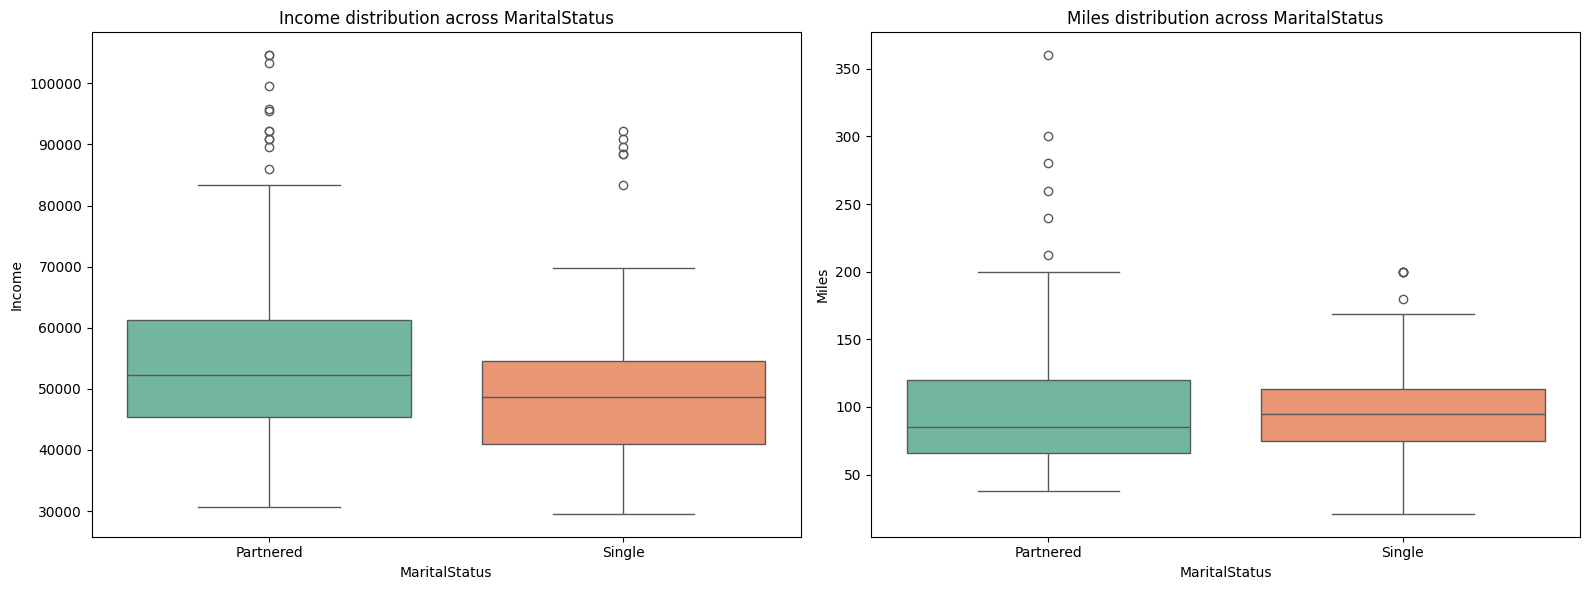

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(16,6))

sns.boxplot(data=df, x="MaritalStatus",y="Income",hue="MaritalStatus",palette="Set2",ax = axes[0])
axes[0].set_title("Income distribution across MaritalStatus")

sns.boxplot(data=df, x="MaritalStatus",y="Miles",hue="MaritalStatus",palette="Set2",ax = axes[1])
axes[1].set_title("Miles distribution across MaritalStatus")

plt.tight_layout()
plt.show()

## Outliers Analysis

In [ ]:
def outlier_summary(df, group_col, value_cols, return_outlier_rows=False):

    records = []
    outliers_dict = {}

    grouped = df.groupby(group_col, observed=False)

    for gval, sub in grouped:
        n = len(sub)
        if n == 0:
            continue
        for col in value_cols:
            # skip if column not numeric
            if col not in sub.columns:
                raise KeyError(f"{col} not in dataframe")
            ser = sub[col].dropna()
            if ser.empty:
                q1 = q3 = iqr = lower = upper = np.nan
                out_cnt = 0
                out_rows = sub.iloc[0:0]  # empty
            else:
                q1 = ser.quantile(0.25)
                q3 = ser.quantile(0.75)
                iqr = q3 - q1
                lower = q1 - 1.5 * iqr
                upper = q3 + 1.5 * iqr
                is_out = (ser < lower) | (ser > upper)
                out_cnt = int(is_out.sum())
                out_rows = sub.loc[is_out.index[is_out].tolist()] if out_cnt > 0 else sub.iloc[0:0]

            out_pct = (out_cnt / n) * 100 if n > 0 else 0.0

            records.append({
                "group_col": group_col,
                "group_value": gval,
                "col": col,
                "n": n,
                "q1": q1,
                "q3": q3,
                "iqr": iqr,
                "lower": lower,
                "upper": upper,
                "outlier_count": out_cnt,
                "outlier_pct": out_pct
            })

            if return_outlier_rows:
                outliers_dict[(gval, col)] = sub.loc[is_out.index[is_out].tolist()] if out_cnt > 0 else sub.iloc[0:0]

    summary_df = pd.DataFrame.from_records(records,
                                          columns=["group_col","group_value","col","n","q1","q3","iqr","lower","upper","outlier_count","outlier_pct"])
    # optional sort
    summary_df = summary_df.sort_values(["col","group_value"]).reset_index(drop=True)

    if return_outlier_rows:
        return summary_df, outliers_dict
    return summary_df


##Outlier Detection

### Product level

In [ ]:
# Product
summary_product = outlier_summary(df, group_col="Product", value_cols=["Income","Miles","Usage","Age"])
display(summary_product)

,group_col,group_value,col,n,q1,q3,iqr,lower,upper,outlier_count,outlier_pct
0,Product,KP281,Age,80,23.00,33.00,10.00,8.000,48.000,1,1.250000
1,Product,KP481,Age,60,24.00,33.25,9.25,10.125,47.125,1,1.666667
2,Product,KP781,Age,40,24.75,30.25,5.50,16.500,38.500,5,12.500000
3,Product,KP281,Income,80,38658.00,53439.00,14781.00,16486.500,75610.500,0,0.000000
4,Product,KP481,Income,60,44911.50,53439.00,8527.50,32120.250,66230.250,2,3.333333
5,Product,KP781,Income,40,58204.75,90886.00,32681.25,9182.875,139907.875,0,0.000000
6,Product,KP281,Miles,80,66.00,94.00,28.00,24.000,136.000,4,5.000000
7,Product,KP481,Miles,60,64.00,106.00,42.00,1.000,169.000,3,5.000000
8,Product,KP781,Miles,40,120.00,200.00,80.00,0.000,320.000,1,2.500000
9,Product,KP281,Usage,80,3.00,4.00,1.00,1.500,5.500,0,0.000000


*  For **Age**, most groups were consistent, but KP781 had ~12.5% customers
outside the typical age band, indicating a small minority segment of atypical age buyers.

*  For **Income**, only KP481 showed a small fraction of outliers (~3%), suggesting a few customers purchase outside the core income group.

*  For **Miles**, KP281 and KP481 each had ~5% of customers with unusually high/low mileage expectations, indicating a niche segment of heavy or light treadmill users.

*  For **Usage**, KP481 showed ~48% flagged as outliers, but this is due to extremely narrow variability (IQR = 0.25). This suggests remarkably consistent treadmill usage among KP481 customers rather than true anomalies.

### Gender level

In [ ]:
# Gender
summary_gender = outlier_summary(df, group_col="Gender", value_cols= ["Usage","Income","Miles"])
display(summary_gender)

,group_col,group_value,col,n,q1,q3,iqr,lower,upper,outlier_count,outlier_pct
0,Gender,Female,Income,76,42921.75,53796.00,10874.25,26610.375,70107.375,3,3.947368
1,Gender,Male,Income,104,45480.00,61611.25,16131.25,21283.125,85808.125,14,13.461538
2,Gender,Female,Miles,76,66.00,100.00,34.00,15.000,151.000,7,9.210526
3,Gender,Male,Miles,104,85.00,141.00,56.00,1.000,225.000,4,3.846154
4,Gender,Female,Usage,76,2.00,4.00,2.00,-1.000,7.000,0,0.000000
5,Gender,Male,Usage,104,3.00,4.00,1.00,1.500,5.500,7,6.730769



*  **Male**: 13.5% outliers → fairly large.A significant minority of males fall outside the main income range. This reinforces our earlier insight that male incomes are more variable, so segmentation (entry-level vs premium treadmills) makes sense.

* **Female**: 9.2% outliers → quite high. Some females run either unusually high or low mileage compared to the majority. This may point to a niche subgroup (e.g., serious female runners).

* **Usage**: Usage is mostly consistent, with only small deviations for Male which we can ignore.

### Marital Status

In [ ]:
summary_marital = outlier_summary(df, group_col="MaritalStatus", value_cols=["Income","Miles"])
display(summary_marital)

,group_col,group_value,col,n,q1,q3,iqr,lower,upper,outlier_count,outlier_pct
0,MaritalStatus,Partnered,Income,107,45480.0,61202.0,15722.0,21897.0,84785.0,12,11.214953
1,MaritalStatus,Single,Income,73,40932.0,54576.0,13644.0,20466.0,75042.0,6,8.219178
2,MaritalStatus,Partnered,Miles,107,66.0,120.0,54.0,-15.0,201.0,6,5.607477
3,MaritalStatus,Single,Miles,73,75.0,113.0,38.0,18.0,170.0,5,6.849315


* For **Income**, both Partnered (11.2%) and Single (8.2%) groups showed notable outliers, suggesting the presence of high-income individuals across both groups.

* For **Miles**, ~5–7% of customers in both groups had unusual mileage expectations. Since this pattern is balanced, it provides limited additional insight so it can be ignored.

#5. Customer Profiling

## Numeric variables

In [ ]:
df.groupby("Product")[["Age","Income","Miles","Usage","Fitness","Education"]].agg(["mean","median","std"])

Age                      Income                              Miles  \
          mean median       std       mean   median           std        mean   
Product                                                                         
KP281    28.55   26.0  7.221452  46418.025  46617.0   9075.783190   82.787500   
KP481    28.90   26.0  6.645248  48973.650  49459.5   8653.989388   87.933333   
KP781    29.10   27.0  6.971738  75441.575  76568.5  18505.836720  166.900000   

                              Usage                  Fitness                   \
        median        std      mean median       std    mean median       std   
Product                                                                         
KP281     85.0  28.874102  3.087500    3.0  0.782624  2.9625    3.0  0.664540   
KP481     85.0  33.263135  3.066667    3.0  0.799717  2.9000    3.0  0.629770   
KP781    160.0  60.066544  4.775000    5.0  0.946993  4.6250    5.0  0.667467   

         Education                   
              mean median       std  
Product                              
KP281    15.037500   16.0  1.216383  
KP481    15.116667   16.0  1.222552  
KP781    17.325000   18.0  1.639066

1. **Income:**
KP781: ~75k (much higher, std 18k → wide spread),
KP281/KP481: ~46–49k (lower, narrower spread).
Clear signal: KP781 = premium, higher-income buyers.

2. **Miles:**
KP781: 167 mean miles , ~2x KP 281/481 (83-88).
KP781 users run way more → serious runners.

3. **Usage:**
KP781: ~4.8 days/week vs ~3 days for KP281/481. KP781 = frequent users.

4. **Fitness:**
KP781: ~4.6 vs ~3 for others. More fitness-conscious, likely advanced.

5. **Education:**
KP781: ~17.3 years vs ~15 for others.More educated → higher-income link.

6. **Age:**
All ~28–29 → not a big differentiator.

## Categorical variables

In [ ]:
pd.crosstab(df["Product"], df["Gender"], normalize="index") * 100

Gender,Female,Male
Product,,
KP281,50.000000,50.000000
KP481,48.333333,51.666667
KP781,17.500000,82.500000


In [ ]:
pd.crosstab(df["Product"], df["MaritalStatus"], normalize="index") * 100

MaritalStatus,Partnered,Single
Product,,
KP281,60.0,40.0
KP481,60.0,40.0
KP781,57.5,42.5


1. **Gender:**
  KP781: 82.5% Male → heavily male-dominated.

    KP281 & KP481: ~50-50 split. Male customers drive premium product sales.

2. **Marital Status:**
All ~60% Partnered, 40% Single → no strong difference.

Based on the above calculated descriptive analytics, Aerofit’s treadmills attract distinct customer segments:

1. **KP281**: Balanced gender distribution, moderate income (~₹46k), casual users with ~3 days/week usage. Best suited for general customers.

2. **KP481**: Similar to KP281 in age and income, but with more consistent usage patterns. Represents mid-tier buyers.

3. **KP781**: Premium segment — higher income (~ ₹75k), frequent users (~5 days/week, 167 miles/month), more educated, and predominantly male (82.5%). This product is strongly positioned for serious runners and high-income professionals.

#6. Probability Analysis (Marginal & Conditional)

## Marginal Probability

Here, we're going to consider probability of each product being purchased ignoring everything else.

In [ ]:
df["Product"].value_counts(normalize=True)*100

,proportion
Product,
KP281,44.444444
KP481,33.333333
KP781,22.222222


KP281 is the most popular treadmill (~ 44%), while KP781 is niche (~ 22%), but higher-end.

## Joint Probability

### Product and Gender

In [ ]:
pd.crosstab(df["Product"],df["Gender"],normalize='all')*100

Gender,Female,Male
Product,,
KP281,22.222222,22.222222
KP481,16.111111,17.222222
KP781,3.888889,18.333333


## Conditional Probability

### Gender given Product

In [ ]:
pd.crosstab(df['Product'],df['Gender'],normalize='index')* 100

Gender,Female,Male
Product,,
KP281,50.000000,50.000000
KP481,48.333333,51.666667
KP781,17.500000,82.500000


### Marital Status given Product

In [ ]:
pd.crosstab(df["Product"], df["MaritalStatus"], normalize="index") * 100

MaritalStatus,Partnered,Single
Product,,
KP281,60.0,40.0
KP481,60.0,40.0
KP781,57.5,42.5



*  Marginal: ~22% of customers buy KP781.
*  Conditional: Among KP781 buyers, 82.5% are Male → clear male skew and married people tend to buy more than single in all the three product categories.

* **Marginal Probability** : KP281 is purchased by ~44% of customers, KP481 by ~33%,
and KP781 by ~22%.

*  **Conditional Probability (Gender):** Among KP781 buyers, ~82.5% are male, showing strong male dominance in premium product purchases. By contrast, KP281 and KP481 buyers are evenly split between genders.

*  **Conditional Probability (Marital Status)**: For all products, ~60% of buyers are Partnered and ~40% Single, showing no strong difference.

*  **Joint Probability**: Only ~4% of all customers are Female KP781 buyers, suggesting an opportunity to target premium female customers.

#7. Insights and Recommendations for Aerofit


1. <u>**KP281 (Entry-Level Product)**</u>

* Profile: Attracts balanced gender split, moderate-income customers (~ ₹46k), with casual treadmill usage (~ 3 times/week).

* Probability: 44% marginal probability → most popular product.

* Action: Market KP281 as the default treadmill for average customers. Campaigns should highlight affordability and general fitness benefits.

2. <u>**KP481 (Mid-Tier Product)**</u>

* Profile: Similar age and income as KP281, but users show highly consistent usage behavior.

* Probability: 33% marginal probability → second most popular product.

* Action: Position KP481 as a reliable, steady-use treadmill for disciplined users. Emphasize durability and stability in marketing.

3. <u>**KP781 (Premium Product)**</u>

* Profile: Higher-income (~ ₹75k), highly educated (~ 17 yrs), heavy users (~ 5 days/week, ~ 167 miles/month), fitness-conscious (~ 4.6/5). Predominantly male (82.5%).

* Probability: Only 22% marginal probability → niche but valuable.

* Action:

  * Target Segment: Focus sales on high-income male customers who are serious runners.

  * Growth Opportunity: Very few female customers buy KP781 (~4% of all customers). Aerofit can develop female-focused campaigns (e.g., “premium fitness for women athletes”) to grow this untapped segment.

4. <u>**Marital Status**</u>

* Analysis shows little difference across products (~60% Partnered vs ~40% Single for all treadmills).

* Action: Marital status should not be used as a key segmentation factor in marketing strategies.